In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1) Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
X = zp.copy()
y = ks.copy()

In [4]:
b = (np.mean(X*y) - np.mean(X)*np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
b

2.620538882402765

In [5]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

In [6]:
y_pred = a + X * b

In [7]:
mse_ = np.sum((y_pred - y)**2) / len(X)
mse_

6470.414201176658

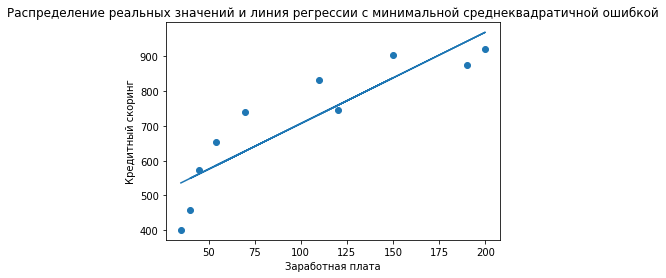

In [8]:
plt.scatter(X, y);
plt.plot(X, y_pred);
plt.title('Распределение реальных значений и линия регрессии с минимальной среднеквадратичной ошибкой');
plt.xlabel('Заработная плата');  plt.ylabel('Кредитный скоринг');

2) Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [9]:
def mse_(w1, y=y[0], X=X[1], n=len(X)):
    return np.sum((w1*X - y)**2) / n

In [10]:
X = X.reshape(-1)
X = np.vstack([np.ones((1, len(X))), X])
X

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [11]:
y = y.reshape((1, len(y)))
y

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [12]:
alpha = 1e-8

In [13]:
w1 = 0.1
w1

0.1

In [14]:
for i in range(10000):
    y_pred1 = w1*X[1]
    w1 -= alpha * (2/len(X)) * np.sum((y_pred1 - y) * X[1]) 
    if i%1000 == 0:
        print('Iteration: {i}, w1 = {w1}, mse={mse}'.format(i=i, w1=w1, mse=mse_(w1)))

Iteration: 0, w1 = 0.10797640400000001, mse=15692.774085987705
Iteration: 1000, w1 = 4.433208961131227, mse=4060.4505521208803
Iteration: 2000, w1 = 5.522858437662347, mse=2324.7518762743716
Iteration: 3000, w1 = 5.79737222761958, mse=1963.3123914998341
Iteration: 4000, w1 = 5.8665300829664115, mse=1877.0684114800745
Iteration: 5000, w1 = 5.883952919746006, mse=1855.6465598986426
Iteration: 6000, w1 = 5.888342229390233, mse=1850.2691717407683
Iteration: 7000, w1 = 5.889448021713085, mse=1848.9156847306608
Iteration: 8000, w1 = 5.889726602346561, mse=1848.5747808349872
Iteration: 9000, w1 = 5.889796784755805, mse=1848.4889023745636


In [15]:
print('Коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). - ', w1)

Коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). -  5.88981445749245


3) В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

In [16]:
# При кол-ве наблюдений менее 30 используеться таблица Стьюдента, в других случаях - таблица Лапласа

4)  Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [23]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [24]:
X = X.reshape(-1)
X = np.vstack([np.ones((1, len(X))), X])
X

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.]])

In [25]:
y = y.reshape((1, len(y)))
y

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [20]:
def mse2(y, y_pred):
    n = y.shape[1]
    err = np.sum((y - y_pred)**2) / n
    return err

In [42]:
W = np.array([[0.1, 0.1]])

alpha = 13*1e-6

for i in range(200000):
    y_pred = np.dot(W, X)
    W[0, 0] -= alpha * (2/len(X)) * np.sum((y_pred - y)) 
    W[0, 1] -= alpha * (2/len(X)) * np.sum((y_pred - y) * X[1]) 
    if i%10000 == 0:
        print('Iteration: {i}, w0 = {w0}, w1 = {w1}, mse={mse}'.format(i=i, w0=W[0, 0],
                                                            w1=W[0, 1], mse=mse2(y, y_pred)))

Iteration: 0, w0 = 0.19095579999999998, w1 = 10.468006999999998, mse=518196.3839999999
Iteration: 10000, w0 = 124.88157457594403, w1 = 4.970697012205843, mse=32333.205888889537
Iteration: 20000, w0 = 214.57109568034906, w1 = 4.310542482862289, mse=19844.26556609266
Iteration: 30000, w0 = 279.06701689848006, w1 = 3.835823987412064, mse=13386.137085641796
Iteration: 40000, w0 = 325.4461680251047, w1 = 3.494452929719498, mse=10046.588461657768
Iteration: 50000, w0 = 358.797512088416, w1 = 3.2489722919372896, mse=8319.681812817931
Iteration: 60000, w0 = 382.7805329891772, w1 = 3.0724466546050477, mse=7426.684911263728
Iteration: 70000, w0 = 400.0267732136946, w1 = 2.945506701551792, mse=6964.909246249529
Iteration: 80000, w0 = 412.42858043858246, w1 = 2.8542239172226735, mse=6726.121447066655
Iteration: 90000, w0 = 421.3467458149796, w1 = 2.78858227710498, mse=6602.642413071083
Iteration: 100000, w0 = 427.7598170906824, w1 = 2.7413792371341246, mse=6538.790441200463
Iteration: 110000, w0 =

In [45]:
print('Коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск. - ', W[0, 0]) 
print('intercept линейной регрессии при заработной плате (zp), используя градиентный спуск. - ', W[0, 1])

Коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск. -  443.5703025735385
intercept линейной регрессии при заработной плате (zp), используя градиентный спуск. -  2.6250070737631304
